C:\Users\simon.lin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


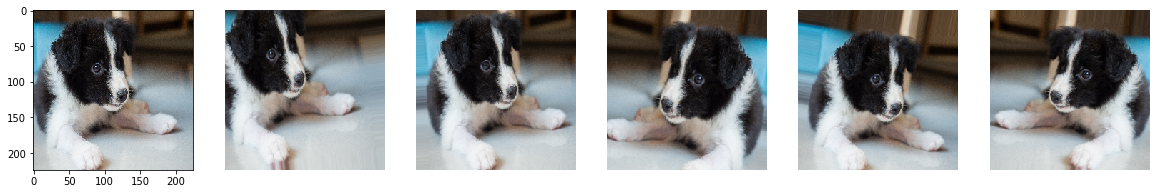

In [26]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

##定義使用的Augmentation

img_gen=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1 ,zoom_range=0.1,horizontal_flip=True,vertical_flip=False,dtype=np.float32)
height=224
batch_size=5

img = cv2.imread('Tano.JPG')  
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy()
img= np.array(img, dtype=np.float32)
img_combine=np.array([img,img,img,img,img],dtype=np.uint8) ##輸入generator要是四維，(224,224,3)變成(4,224,224,3)
batch_gen = img_gen.flow(img_combine, batch_size=5)
#assert next(batch_gen).shape==(batch_size, width, height, 3)

plt.figure(figsize=(20,10))
i = 1
for batch in batch_gen:
    plt.subplot(1, 6, 1)
    plt.imshow(img_origin) ##原圖
    plt.subplot(1, 6, i+1)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.imshow(batch[1, :, :, :].astype(np.uint8))
    plt.imshow(batch[2, :, :, :].astype(np.uint8))
    plt.imshow(batch[3, :, :, :].astype(np.uint8))
    plt.imshow(batch[4, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 5:
        break  # or the generator would loop infinitely

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
K.set_image_dim_ordering('th')

#Training Generator
train_datagen = ImageDataGenerator(rescale = 2,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
#Test Generator，只需要Rescale，不需要其他增強
test_datagen = ImageDataGenerator(rescale = 1./255)

#將路徑給Generator，自動產生Label
training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 64, 64)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))    
model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

# classifier = Sequential()
# classifier.add(Convolution2D(32, (3, 3),  padding='same', input_shape=(3, 64, 64)))
# classifier.add(Activation('relu'))
# classifier.add(MaxPooling2D(pool_size=(3, 3)))
# classifier.add(Convolution2D(32, (3, 3))
# classifier.add(Activation('relu'))
# classifier.add(MaxPooling2D(pool_size=(3, 3)))
# classifier.add(Convolution2D(32, (3, 3))
# classifier.add(Activation('relu'))
# classifier.add(MaxPooling2D(pool_size=(3, 3)))
# classifier.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# classifier.add(Dense(64))
# classifier.add(Activation('relu'))
# classifier.add(Dropout(0.5))
# classifier.add(Dense(1))
# classifier.add(Activation('sigmoid'))
# classifier.compile(loss='binary_crossentropy',
#                   optimizer='rmsprop',
#                   metrics=['accuracy'])


#訓練
model.fit_generator(training_set,steps_per_epoch = 250,nb_epoch = 25,
                         validation_data = test_set,validation_steps = 63)

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


C:\Users\simon.lin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 64, 64...)`
C:\Users\simon.lin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
C:\Users\simon.lin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
C:\Users\simon.lin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps



Epoch 1/25
250/250 [==============================] - 156s 625ms/step - loss: 0.1337 - acc: 0.9911 - val_loss: 0.3992 - val_acc: 1.0000
Epoch 2/25
250/250 [==============================] - 143s 572ms/step - loss: 1.3976e-06 - acc: 1.0000 - val_loss: 0.3389 - val_acc: 1.0000
Epoch 3/25
250/250 [==============================] - 131s 524ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3396 - val_acc: 1.0000
Epoch 4/25
250/250 [==============================] - 60s 238ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3388 - val_acc: 1.0000
Epoch 5/25
250/250 [==============================] - 52s 207ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3388 - val_acc: 1.0000
Epoch 6/25
250/250 [==============================] - 52s 210ms/step - loss: 0.0027 - acc: 0.9998 - val_loss: 0.2883 - val_acc: 1.0000
Epoch 7/25
250/250 [==============================] - 36s 143ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2871 - val_acc: 1.0000
Epoch 8/25
250/250 [==========

In [50]:
#預測新照片
from keras.preprocessing import image as image_utils
test_image = image_utils.load_img('dataset/new_images/new_picture.jpg', target_size=(224, 224))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) 

result = classifier.predict_on_batch(test_image)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/new_images/new_picture.jpg'